In [1]:
import pandas as pd
import numpy as np
import sqlite3
import re
import datetime
from functools import reduce
import requests
!pip install BeautifulSoup4
!pip install lxml
from bs4 import BeautifulSoup

In [2]:
#Import Data Base
# Create the connection with my downloaded data base
cnx = sqlite3.connect('/home/luana/IRONHACK/Ironhack-Module-1-Project/data/luanasolis.db')
# create the dataframe from a query
df_business = pd.read_sql_query("SELECT * FROM business_info", cnx)
df_rank = pd.read_sql_query("SELECT * FROM rank_info", cnx)
df_personal = pd.read_sql_query("SELECT * FROM personal_info", cnx)

In [3]:
#function for data adquisition:
dfs = [df_business,df_rank,df_personal]
def merge_df (list_df , column):
    return reduce(lambda left,right: pd.merge(left,right,on=column), list_df)
#given data base
df_ppl1 = merge_df (dfs , 'id')
df_ppl1.head()

,id,Unnamed: 0_x,Source,worth,worthChange,realTimeWorth,realTimePosition,name,position,Unnamed: 0_y,lastName,age,Unnamed: 0,gender,country,image
0,7706,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,None,1,jeff BEZos,1.0,52,BEZOS,54 years old,52,M,United States,https://specials-images.forbesimg.com/imageser...
1,7338,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,None,2,bill GATES,2.0,53,gATEs,62 years old,53,M,United States,https://specials-images.forbesimg.com/imageser...
2,9531,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,None,3,wARREN BUFFETt,3.0,54,buFFETt,87 years old,54,M,None,https://specials-images.forbesimg.com/imageser...
3,5476,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,None,4,bERNARD ARNAULT,4.0,55,ARNAULT,69 years old,55,None,None,https://specials-images.forbesimg.com/imageser...
4,9878,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,None,5,mark ZUCKerberg,5.0,56,zuckeRBERG,1985,56,M,None,https://specials-images.forbesimg.com/imageser...


In [4]:
#import extra data from forbes web json
#https://www.forbes.com/ajax/list/data?year=2018&uri=billionaires&type=person
df_json = pd.read_json('https://www.forbes.com/ajax/list/data?year=2018&uri=billionaires&type=person', orient='records')
df_forbesjson = df_json[['realTimePosition','name', 'age','country','gender']]
result = df_forbesjson.sort_values(by='realTimePosition', inplace=True)
df_forbesjson.head()

/home/luana/miniconda3/envs/data_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,realTimePosition,name,age,country,gender
272,1.0,Jeff Bezos,55.0,United States,M
275,2.0,Bernard Arnault,70.0,France,M
273,3.0,Bill Gates,64.0,United States,M
274,4.0,Warren Buffett,89.0,United States,M
276,5.0,Mark Zuckerberg,35.0,United States,M


In [5]:
#Convert name columns from both data frames in upper case letter so we can merge forbes web json with pur df:
#Function:
def upper_case(dataframe , column):
    return dataframe[column].str.upper() 

#Aplications:
df_ppl1['name'] = upper_case(df_ppl1 , 'name')
df_forbesjson['name'] = upper_case(df_forbesjson , 'name')

/home/luana/miniconda3/envs/data_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
#Merging initial data frame with forbes web information data frame:
df_total = [df_ppl1,df_forbesjson]

df_ppl2 = merge_df (df_total , 'name')
df_ppl2.head()

,id,Unnamed: 0_x,Source,worth,worthChange,realTimeWorth,realTimePosition_x,name,position,Unnamed: 0_y,lastName,age_x,Unnamed: 0,gender_x,country_x,image,realTimePosition_y,age_y,country_y,gender_y
0,7706,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,None,1,JEFF BEZOS,1.0,52,BEZOS,54 years old,52,M,United States,https://specials-images.forbesimg.com/imageser...,1.0,55.0,United States,M
1,7338,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,None,2,BILL GATES,2.0,53,gATEs,62 years old,53,M,United States,https://specials-images.forbesimg.com/imageser...,3.0,64.0,United States,M
2,9531,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,None,3,WARREN BUFFETT,3.0,54,buFFETt,87 years old,54,M,None,https://specials-images.forbesimg.com/imageser...,4.0,89.0,United States,M
3,5476,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,None,4,BERNARD ARNAULT,4.0,55,ARNAULT,69 years old,55,None,None,https://specials-images.forbesimg.com/imageser...,2.0,70.0,France,M
4,9878,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,None,5,MARK ZUCKERBERG,5.0,56,zuckeRBERG,1985,56,M,None,https://specials-images.forbesimg.com/imageser...,5.0,35.0,United States,M


In [7]:
#Function to separate columns
def separate_columns(dataframe , column, split_ch, T_F):
    return dataframe[column].str.split(split_ch, n = 1, expand = T_F) 

#separate column source into sector and company
df_ppl2['Sector'] = separate_columns(df_ppl2 , 'Source', '==>',True)[0]
df_ppl2['Company'] = separate_columns(df_ppl2 , 'Source', '==>',True)[1]
df_ppl2.head()


,id,Unnamed: 0_x,Source,worth,worthChange,realTimeWorth,realTimePosition_x,name,position,Unnamed: 0_y,...,Unnamed: 0,gender_x,country_x,image,realTimePosition_y,age_y,country_y,gender_y,Sector,Company
0,7706,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,None,1,JEFF BEZOS,1.0,52,...,52,M,United States,https://specials-images.forbesimg.com/imageser...,1.0,55.0,United States,M,Technology,Amazon
1,7338,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,None,2,BILL GATES,2.0,53,...,53,M,United States,https://specials-images.forbesimg.com/imageser...,3.0,64.0,United States,M,Technology,Microsoft
2,9531,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,None,3,WARREN BUFFETT,3.0,54,...,54,M,None,https://specials-images.forbesimg.com/imageser...,4.0,89.0,United States,M,Finance and Investments,Berkshire Hathaway
3,5476,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,None,4,BERNARD ARNAULT,4.0,55,...,55,None,None,https://specials-images.forbesimg.com/imageser...,2.0,70.0,France,M,Fashion & Retail,LVMH
4,9878,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,None,5,MARK ZUCKERBERG,5.0,56,...,56,M,None,https://specials-images.forbesimg.com/imageser...,5.0,35.0,United States,M,Technology,Facebook


In [8]:
#Cleaning Text and Removing Special Characters

#Worth is billion USD column we will change to millions
df_ppl2.worth.replace('[ BUSD]+$','', regex=True, inplace=True)
df_ppl2['worth(M.USD)'] =df_ppl2['worth'].astype(float)*1000
#WorthChange is million USD column we will change to millions and change na to 0.0
df_ppl2.worthChange.replace('[ millions USD]+$','', regex=True, inplace=True)
df_ppl2.worthChange.replace('[na]+$','0.0', regex=True, inplace=True)
df_ppl2['worthChange(M.USD)'] =df_ppl2['worthChange'].astype(float)
#Age without years old 
df_ppl2.age_x.replace('[ years old]+$','', regex=True, inplace=True)
df_ppl2.age_x.replace('NaN','0', regex=True, inplace=True)

In [9]:
#Unificate age column
current_year = datetime.datetime.today().year
age = []
for i in df_ppl2['age_x'].astype(float):
    if i>150:
        age.append(str(current_year-int(i)))
    else:
        age.append(i)

df_ppl2['age_x'] = age
df_ppl2.head()

,id,Unnamed: 0_x,Source,worth,worthChange,realTimeWorth,realTimePosition_x,name,position,Unnamed: 0_y,...,country_x,image,realTimePosition_y,age_y,country_y,gender_y,Sector,Company,worth(M.USD),worthChange(M.USD)
0,7706,52,Technology ==> Amazon,112.0,0.0,None,1,JEFF BEZOS,1.0,52,...,United States,https://specials-images.forbesimg.com/imageser...,1.0,55.0,United States,M,Technology,Amazon,112000.0,0.000
1,7338,53,Technology ==> Microsoft,90.0,-0.001,None,2,BILL GATES,2.0,53,...,United States,https://specials-images.forbesimg.com/imageser...,3.0,64.0,United States,M,Technology,Microsoft,90000.0,-0.001
2,9531,54,Finance and Investments ==> Berkshire Hathaway,84.0,-0.002,None,3,WARREN BUFFETT,3.0,54,...,None,https://specials-images.forbesimg.com/imageser...,4.0,89.0,United States,M,Finance and Investments,Berkshire Hathaway,84000.0,-0.002
3,5476,55,Fashion & Retail ==> LVMH,72.0,0.0,None,4,BERNARD ARNAULT,4.0,55,...,None,https://specials-images.forbesimg.com/imageser...,2.0,70.0,France,M,Fashion & Retail,LVMH,72000.0,0.000
4,9878,56,Technology ==> Facebook,71.0,0.0,None,5,MARK ZUCKERBERG,5.0,56,...,None,https://specials-images.forbesimg.com/imageser...,5.0,35.0,United States,M,Technology,Facebook,71000.0,0.000


In [10]:
#change Male into M and Female into F
df_ppl2.gender_x.replace('Male','M', regex=True, inplace=True)
df_ppl2.gender_x.replace('Female','F', regex=True, inplace=True)
df_ppl2

,id,Unnamed: 0_x,Source,worth,worthChange,realTimeWorth,realTimePosition_x,name,position,Unnamed: 0_y,...,country_x,image,realTimePosition_y,age_y,country_y,gender_y,Sector,Company,worth(M.USD),worthChange(M.USD)
0,7706,52,Technology ==> Amazon,112.0,0.0,None,1,JEFF BEZOS,1.0,52,...,United States,https://specials-images.forbesimg.com/imageser...,1.0,55.0,United States,M,Technology,Amazon,112000.0,0.000
1,7338,53,Technology ==> Microsoft,90.0,-0.001,None,2,BILL GATES,2.0,53,...,United States,https://specials-images.forbesimg.com/imageser...,3.0,64.0,United States,M,Technology,Microsoft,90000.0,-0.001
2,9531,54,Finance and Investments ==> Berkshire Hathaway,84.0,-0.002,None,3,WARREN BUFFETT,3.0,54,...,None,https://specials-images.forbesimg.com/imageser...,4.0,89.0,United States,M,Finance and Investments,Berkshire Hathaway,84000.0,-0.002
3,5476,55,Fashion & Retail ==> LVMH,72.0,0.0,None,4,BERNARD ARNAULT,4.0,55,...,None,https://specials-images.forbesimg.com/imageser...,2.0,70.0,France,M,Fashion & Retail,LVMH,72000.0,0.000
4,9878,56,Technology ==> Facebook,71.0,0.0,None,5,MARK ZUCKERBERG,5.0,56,...,None,https://specials-images.forbesimg.com/imageser...,5.0,35.0,United States,M,Technology,Facebook,71000.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,9364,2255,"Fashion & Retail ==> fashion, entertainment",1.0,0.0,None,2134,ZHAO XIAOQIANG,2204.0,2255,...,None,https://specials-images.forbesimg.com/imageser...,NaN,52.0,China,M,Fashion & Retail,"fashion, entertainment",1000.0,0.000
2177,1831,2256,Manufacturing ==> electrical equipment,1.0,0.0,None,2134,ZHOU LIANGZHANG,2205.0,2256,...,None,https://specials-images.forbesimg.com/imageser...,NaN,57.0,China,M,Manufacturing,electrical equipment,1000.0,0.000
2178,9957,2257,Manufacturing ==> electrical equipment,1.0,0.0,None,1856,ZHU XINGMING,2206.0,2257,...,None,https://specials-images.forbesimg.com/imageser...,2055.0,52.0,China,M,Manufacturing,electrical equipment,1000.0,0.000
2179,5714,2258,Manufacturing ==> printed circuit boards,1.0,0.0,None,1978,ZHUO JUN,2207.0,2258,...,None,https://specials-images.forbesimg.com/imageser...,1619.0,54.0,Hong Kong,F,Manufacturing,printed circuit boards,1000.0,0.000


In [11]:
#Function to drop columns with not usefull information
def drop_columns(dataframe , column, T_F):
    return dataframe.drop(column, axis=1,inplace=T_F) 

df_ppl3 = drop_columns(df_ppl2 , ['realTimeWorth','Unnamed: 0_y','Unnamed: 0_x','Unnamed: 0','lastName','Source','worth','worthChange'],False)
df_ppl3.head()

,id,realTimePosition_x,name,position,age_x,gender_x,country_x,image,realTimePosition_y,age_y,country_y,gender_y,Sector,Company,worth(M.USD),worthChange(M.USD)
0,7706,1,JEFF BEZOS,1.0,54,M,United States,https://specials-images.forbesimg.com/imageser...,1.0,55.0,United States,M,Technology,Amazon,112000.0,0.000
1,7338,2,BILL GATES,2.0,62,M,United States,https://specials-images.forbesimg.com/imageser...,3.0,64.0,United States,M,Technology,Microsoft,90000.0,-0.001
2,9531,3,WARREN BUFFETT,3.0,87,M,None,https://specials-images.forbesimg.com/imageser...,4.0,89.0,United States,M,Finance and Investments,Berkshire Hathaway,84000.0,-0.002
3,5476,4,BERNARD ARNAULT,4.0,69,None,None,https://specials-images.forbesimg.com/imageser...,2.0,70.0,France,M,Fashion & Retail,LVMH,72000.0,0.000
4,9878,5,MARK ZUCKERBERG,5.0,35,M,None,https://specials-images.forbesimg.com/imageser...,5.0,35.0,United States,M,Technology,Facebook,71000.0,0.000


In [12]:
df_final = df_ppl3[['realTimePosition_x','name','age_x','Sector', 'Company', 'worth(M.USD)', 'country_y', 'gender_y' ]]
df_final = df_final.rename(columns={'realTimePosition_x':'Position',
                         'name':'Name',
                         'age_x':'Age',
                         'worth(M.USD)':'Worth(M.USD)',
                         'country_y': 'Country',
                         'gender_y':'Gender'})
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 2180
Data columns (total 8 columns):
Position        2181 non-null int64
Name            2181 non-null object
Age             2121 non-null object
Sector          2181 non-null object
Company         2181 non-null object
Worth(M.USD)    2181 non-null float64
Country         2181 non-null object
Gender          2169 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 153.4+ KB


In [13]:
#Starting Web Scraping v1 PIB por pais

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
html = requests.get(url).content
html[0:500]

soup = BeautifulSoup(html, 'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by GDP (nominal) per capita - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xhg0xgpAAD8AAGwh@CEAAABO","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)_per_capita","wgTitle":"List of countries by GDP (nominal) per capita","wgCurRevisionId":934413148,"wgRevisionId":934413148,"wgArticleId":1050736,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCa

In [14]:
# sortable wikitable comes from inspecting the element on the web browser
table = soup.find_all('table',{'class':'wikitable sortable'})[0]
table

<table class="wikitable sortable" style="margin-left:auto;margin-right:auto;text-align: right">
<tbody><tr>
<th data-sort-type="number">Rank
</th>
<th>Country/Territory
</th>
<th><a href="/wiki/United_States_dollar" title="United States dollar">US$</a>
</th></tr>
<tr>
<td>1</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x" width="23"/> </span><a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a></td>
<td>113,196
</td></tr>
<tr>
<td>2</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="512" data-fil

In [15]:
# tr represent the table rows
rows = table.find_all('tr')
rows_parsed = [row.text for row in rows]
rows_parsed

['\nRank\n\nCountry/Territory\n\nUS$\n',
 '\n1\n\xa0Luxembourg\n113,196\n',
 '\n2\n\xa0\xa0Switzerland\n83,716\n',
 '\n—\n\xa0Macau\n81,151\n',
 '\n3\n\xa0Norway\n77,975\n',
 '\n4\n\xa0Ireland\n77,771\n',
 '\n5\n\xa0Qatar\n69,687\n',
 '\n6\n\xa0Iceland\n67,037\n',
 '\n7\n\xa0United States\n65,111\n',
 '\n8\n\xa0Singapore\n63,987\n',
 '\n9\n\xa0Denmark\n59,795\n',
 '\n10\n\xa0Australia\n53,825\n',
 '\n11\n\xa0Netherlands\n52,367\n',
 '\n12\n\xa0Sweden\n51,241\n',
 '\n13\n\xa0Austria\n50,022\n',
 '\n—\n\xa0Hong Kong\n49,334\n',
 '\n14\n\xa0Finland\n48,868\n',
 '\n15\n\xa0San Marino\n47,279\n',
 '\n16\n\xa0Germany\n46,563\n',
 '\n17\n\xa0Canada\n46,212\n',
 '\n18\n\xa0Belgium\n45,175\n',
 '\n19\n\xa0Israel\n42,823\n',
 '\n20\n\xa0France\n41,760\n',
 '\n21\n\xa0United Kingdom\n41,030\n',
 '\n22\n\xa0Japan\n40,846\n',
 '\n23\n\xa0New Zealand\n40,634\n',
 '\n24\n\xa0United Arab Emirates\n37,749\n',
 '\n25\n\xa0Bahamas, The\n33,261\n',
 '\n26\n\xa0Italy\n32,946\n',
 '\n—\n\xa0Puerto Rico\n31,

In [16]:
def smart_parser(row_text):
    row_text = row_text.replace('\n\n', '\n').strip('\n')
    row_text = re.sub('\[\d\]', '', row_text)
    return list(map(lambda x: x.strip(), row_text.split('\n')))

well_parsed = list(map(lambda x: smart_parser(x), rows_parsed))

well_parsed

[['Rank', 'Country/Territory', 'US$'],
 ['1', 'Luxembourg', '113,196'],
 ['2', 'Switzerland', '83,716'],
 ['—', 'Macau', '81,151'],
 ['3', 'Norway', '77,975'],
 ['4', 'Ireland', '77,771'],
 ['5', 'Qatar', '69,687'],
 ['6', 'Iceland', '67,037'],
 ['7', 'United States', '65,111'],
 ['8', 'Singapore', '63,987'],
 ['9', 'Denmark', '59,795'],
 ['10', 'Australia', '53,825'],
 ['11', 'Netherlands', '52,367'],
 ['12', 'Sweden', '51,241'],
 ['13', 'Austria', '50,022'],
 ['—', 'Hong Kong', '49,334'],
 ['14', 'Finland', '48,868'],
 ['15', 'San Marino', '47,279'],
 ['16', 'Germany', '46,563'],
 ['17', 'Canada', '46,212'],
 ['18', 'Belgium', '45,175'],
 ['19', 'Israel', '42,823'],
 ['20', 'France', '41,760'],
 ['21', 'United Kingdom', '41,030'],
 ['22', 'Japan', '40,846'],
 ['23', 'New Zealand', '40,634'],
 ['24', 'United Arab Emirates', '37,749'],
 ['25', 'Bahamas, The', '33,261'],
 ['26', 'Italy', '32,946'],
 ['—', 'Puerto Rico', '31,538'],
 ['27', 'Korea, South', '31,430'],
 ['28', 'Malta', '30,

In [17]:
colnames = ['Rank',
  'Country',
  'GDP USD']
data = well_parsed[1:]
df = pd.DataFrame(data, columns=colnames)
df

,Rank,Country,GDP USD
0,1,Luxembourg,"113,196"
1,2,Switzerland,"83,716"
2,—,Macau,"81,151"
3,3,Norway,"77,975"
4,4,Ireland,"77,771"
...,...,...,...
188,182,Niger,405
189,183,Malawi,370
190,184,Eritrea,342
191,185,Burundi,309


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
Rank       193 non-null object
Country    193 non-null object
GDP USD    193 non-null object
dtypes: object(3)
memory usage: 4.6+ KB


In [19]:
#Starting Web Scraping v2 --> poblacion por país

url2 = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
html2 = requests.get(url2).content
html2[0:500]


b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries and dependencies by population - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["'

In [20]:
soup2 = BeautifulSoup(html2, 'lxml')
soup2

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries and dependencies by population - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XhgzFApAIC0AAL7O3aEAAACD","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_and_dependencies_by_population","wgTitle":"List of countries and dependencies by population","wgCurRevisionId":935065287,"wgRevisionId":935065287,"wgArticleId":69058,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"

In [21]:
# sortable table comes from inspecting the element on the web browser
table2 = soup2.find_all('table',{'class':'wikitable sortable mw-datatable'})[0]
table2

<table class="wikitable sortable mw-datatable" style="margin:auto;text-align:right">
<tbody><tr>
<th data-sort-type="number">Rank</th>
<th>Country<br/><small>(or dependent territory)</small></th>
<th>Population</th>
<th>% of World
<p>Population
</p>
</th>
<th>Date</th>
<th class="unsortable">Source
</th></tr>
<tr>
<td>1</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span> <a href="/wiki/Demographics_of

In [22]:
# tr represent the table rows
rows2 = table2.find_all('tr')
rows_parsed2 = [row.text for row in rows2]
rows_parsed2

['\nRank\nCountry(or dependent territory)\nPopulation\n% of World\nPopulation\n\n\nDate\nSource\n',
 '\n1\n\xa0China[b]\n1,400,825,000\n18.1%\n10 Jan 2020\nNational population clock[3]\n',
 '\n2\n\xa0India\n1,357,165,850\n17.5%\n10 Jan 2020\nNational population clock[4]\n',
 '\n3\n\xa0United States[c]\n330,563,468\n4.26%\n10 Jan 2020\nNational population clock[5]\n',
 '\n4\n\xa0Indonesia\n266,911,900\n3.44%\n1 Jul 2019\nNational annual projection[6]\n',
 '\n5\n\xa0Pakistan\n218,231,000\n2.81%\n10 Jan 2020\nNational population clock[7]\n',
 '\n6\n\xa0Brazil\n210,964,296\n2.72%\n10 Jan 2020\nNational population clock[8]\n',
 '\n7\n\xa0Nigeria\n200,963,599\n2.59%\n1 Jul 2019\nUN Projection[2]\n',
 '\n8\n\xa0Bangladesh\n167,904,962\n2.16%\n10 Jan 2020\nNational population clock[9]\n',
 '\n9\n\xa0Russia[d]\n146,780,720\n1.89%\n1 Jan 2019\nNational estimate[10]\n',
 '\n10\n\xa0Mexico\n127,191,826\n1.64%\n1 Jan 2020\nNational annual projection[11]\n',
 '\n11\n\xa0Japan\n126,150,000\n1.63%\n1 

In [23]:
def smart_parser2(row_text):
    row_text = row_text.replace('\n\n', '\n').strip('\n')
    row_text = re.sub('\[\w\]', '', row_text)
    return list(map(lambda x: x.strip(), row_text.split('\n')))

well_parsed2 = list(map(lambda x: smart_parser2(x), rows_parsed2))

well_parsed2

[['Rank',
  'Country(or dependent territory)',
  'Population',
  '% of World',
  'Population',
  '',
  'Date',
  'Source'],
 ['1',
  'China',
  '1,400,825,000',
  '18.1%',
  '10 Jan 2020',
  'National population clock'],
 ['2',
  'India',
  '1,357,165,850',
  '17.5%',
  '10 Jan 2020',
  'National population clock'],
 ['3',
  'United States',
  '330,563,468',
  '4.26%',
  '10 Jan 2020',
  'National population clock'],
 ['4',
  'Indonesia',
  '266,911,900',
  '3.44%',
  '1 Jul 2019',
  'National annual projection'],
 ['5',
  'Pakistan',
  '218,231,000',
  '2.81%',
  '10 Jan 2020',
  'National population clock'],
 ['6',
  'Brazil',
  '210,964,296',
  '2.72%',
  '10 Jan 2020',
  'National population clock'],
 ['7', 'Nigeria', '200,963,599', '2.59%', '1 Jul 2019', 'UN Projection'],
 ['8',
  'Bangladesh',
  '167,904,962',
  '2.16%',
  '10 Jan 2020',
  'National population clock'],
 ['9',
  'Russia',
  '146,780,720',
  '1.89%',
  '1 Jan 2019',
  'National estimate[10]'],
 ['10',
  'Mexico',
 

In [24]:
colnames2 = ['Rank',
  'Country',
  'Population',
  '% of World Population',
  'Date',
  'Source']
data2 = well_parsed2[1:245]
df2 = pd.DataFrame(data2, columns=colnames2)
df2.head()

,Rank,Country,Population,% of World Population,Date,Source
0,1,China,"1,400,825,000",18.1%,10 Jan 2020,National population clock
1,2,India,"1,357,165,850",17.5%,10 Jan 2020,National population clock
2,3,United States,"330,563,468",4.26%,10 Jan 2020,National population clock
3,4,Indonesia,"266,911,900",3.44%,1 Jul 2019,National annual projection
4,5,Pakistan,"218,231,000",2.81%,10 Jan 2020,National population clock


In [25]:
df_scrap = [df2,df]

df_pop = merge_df (df_scrap , 'Country')
df_pop.head()

,Rank_x,Country,Population,% of World Population,Date,Source,Rank_y,GDP USD
0,1,China,"1,400,825,000",18.1%,10 Jan 2020,National population clock,65,"10,098"
1,2,India,"1,357,165,850",17.5%,10 Jan 2020,National population clock,139,"2,171"
2,3,United States,"330,563,468",4.26%,10 Jan 2020,National population clock,7,"65,111"
3,4,Indonesia,"266,911,900",3.44%,1 Jul 2019,National annual projection,109,"4,163"
4,5,Pakistan,"218,231,000",2.81%,10 Jan 2020,National population clock,151,"1,388"


In [26]:
df_adding = df_pop[['Country','GDP USD','Population']]


In [27]:
df_union = [df_final,df_adding]

df_final2 = merge_df (df_union , 'Country')
df_final2.head()

,Position,Name,Age,Sector,Company,Worth(M.USD),Country,Gender,GDP USD,Population
0,1,JEFF BEZOS,54,Technology,Amazon,112000.0,United States,M,"65,111","330,563,468"
1,2,BILL GATES,62,Technology,Microsoft,90000.0,United States,M,"65,111","330,563,468"
2,3,WARREN BUFFETT,87,Finance and Investments,Berkshire Hathaway,84000.0,United States,M,"65,111","330,563,468"
3,5,MARK ZUCKERBERG,35,Technology,Facebook,71000.0,United States,M,"65,111","330,563,468"
4,12,CHARLES KOCH,82,Diversified,Koch Industries,60000.0,United States,M,"65,111","330,563,468"


In [28]:
#Top 20 countries with millionaire people
from matplotlib import pyplot as plt 
data_graph1 = df_final2.groupby('Country')['Name'].count().sort_values(ascending=False)[:20]
data_graph1.plot(kind='bar')


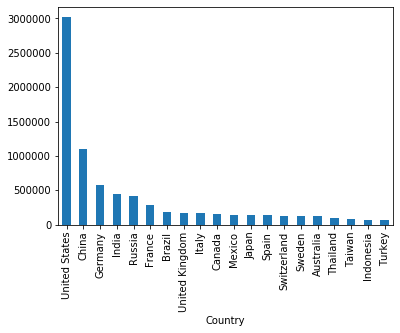

In [29]:
#Top 20 scountries by Worth sum
data_graph2 = df_final2.groupby('Country')['Worth(M.USD)'].sum().sort_values(ascending=False)[:20]
data_graph2.plot(kind='bar')

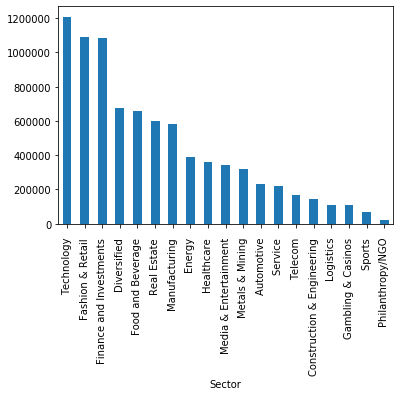

In [30]:
#Top 20 Sectors by Worth sum
data_graph2 = df_final2.groupby('Sector')['Worth(M.USD)'].sum().sort_values(ascending=False)[:20]
data_graph2.plot(kind='bar')

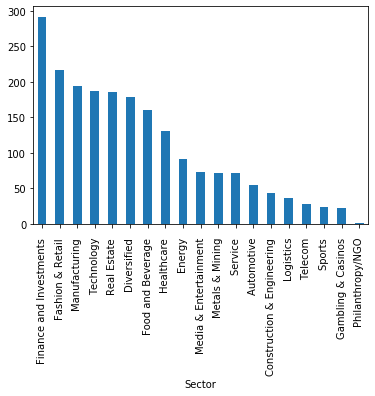

In [31]:
#Top 20 Sectors by companies count
data_graph2 = df_final2.groupby('Sector')['Company'].count().sort_values(ascending=False)[:20]
data_graph2.plot(kind='bar')